In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
logs = []

with open('../data/p3.3.t_combined_visit/same/log.pkl', 'rb') as f:
    while True:
        try:
            logs.append(pickle.load(f))
        except EOFError:
            break
logs = np.array(logs)
logs.shape

(30, 2251, 3)

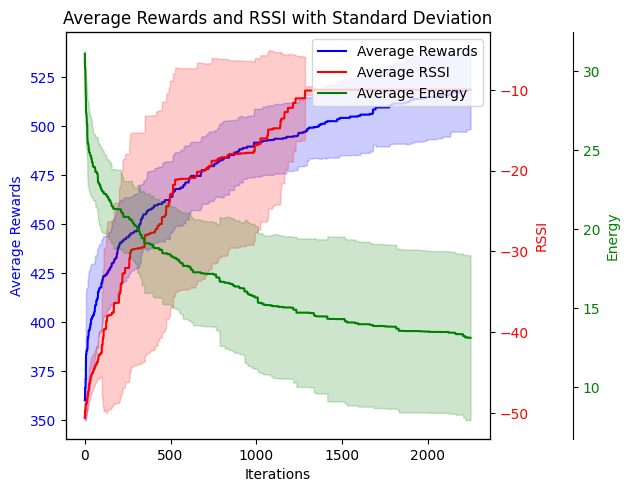

In [4]:
avg_rewards = np.mean(logs[:, :, 0], axis=0)
std_rewards = np.std(logs[:, :, 0], axis=0)

avg_rssi = np.mean(logs[:, :, 1], axis=0)
std_rssi = np.std(logs[:, :, 1], axis=0)

avg_energy = np.mean(logs[:, :, 2], axis=0)
std_energy = np.std(logs[:, :, 2], axis=0)

fig, ax1 = plt.subplots()

# Plotting the average rewards with standard deviation
ax1.plot(range(len(avg_rewards)), avg_rewards, 'b-', label='Average Rewards')
ax1.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, color='b', alpha=0.2)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Average Rewards', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for RSSI
ax2 = ax1.twinx()
ax2.plot(range(len(avg_rssi)), avg_rssi, 'r-', label='Average RSSI')
ax2.fill_between(range(len(avg_rssi)), avg_rssi - std_rssi, avg_rssi + std_rssi, color='r', alpha=0.2)
ax2.set_ylabel('RSSI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a third y-axis for Energy
ax3 = ax1.twinx()
ax3.plot(range(len(avg_energy)), avg_energy, 'g-', label='Average Energy')
ax3.fill_between(range(len(avg_energy)), avg_energy - std_energy, avg_energy + std_energy, color='g', alpha=0.2)
ax3.set_ylabel('Energy', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 60))

fig.legend(bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.title('Average Rewards and RSSI with Standard Deviation')
plt.show()